In [120]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
data = pd.read_csv("data.csv")
data.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
142,869218,B,11.43,17.31,73.66,398.0,0.10920,0.09486,0.020310,0.018610,...,26.76,82.66,503.0,0.14130,0.17920,0.07708,0.06402,0.2584,0.08096,NaN
203,87880,M,13.81,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.091760,...,41.85,128.50,1153.0,0.22260,0.52090,0.46460,0.20130,0.4432,0.10860,NaN
307,89346,B,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,...,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804,NaN
413,905557,B,14.99,22.11,97.53,693.7,0.08515,0.10250,0.068590,0.038760,...,31.55,110.20,867.1,0.10770,0.33450,0.31140,0.13080,0.3163,0.09251,NaN
451,9111805,M,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.165500,0.090630,...,30.96,139.80,1421.0,0.15280,0.18450,0.39770,0.14660,0.2293,0.06091,NaN


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [126]:
data = data.drop(['Unnamed: 32', 'id'], axis = 1)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

print(data['diagnosis'].unique())

[1 0]


In [128]:
data.sample(6)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
101,0,6.981,13.43,43.79,143.5,0.11700,0.07568,0.000000,0.000000,0.1930,...,7.93,19.54,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382
308,0,13.500,12.71,85.69,566.2,0.07376,0.03614,0.002758,0.004419,0.1365,...,14.97,16.94,95.48,698.7,0.09023,0.05836,0.01379,0.02210,0.2267,0.06192
503,1,23.090,19.83,152.10,1682.0,0.09342,0.12750,0.167600,0.100300,0.1505,...,30.79,23.87,211.50,2782.0,0.11990,0.36250,0.37940,0.22640,0.2908,0.07277
413,0,14.990,22.11,97.53,693.7,0.08515,0.10250,0.068590,0.038760,0.1944,...,16.76,31.55,110.20,867.1,0.10770,0.33450,0.31140,0.13080,0.3163,0.09251
338,0,10.050,17.53,64.41,310.8,0.10070,0.07326,0.025110,0.017750,0.1890,...,11.16,26.84,71.98,384.0,0.14020,0.14020,0.10550,0.06499,0.2894,0.07664
464,0,13.170,18.22,84.28,537.3,0.07466,0.05994,0.048590,0.028700,0.1454,...,14.90,23.89,95.10,687.6,0.12820,0.19650,0.18760,0.10450,0.2235,0.06925


In [130]:
y = data.diagnosis.values
x_data = data.drop(['diagnosis'],axis=1)

In [132]:
x_data.sample(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
11,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.1810,0.3792,0.10480
268,12.87,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,0.05769,...,13.90,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.0578,0.3604,0.07062
207,17.01,20.26,109.70,904.3,0.08772,0.07304,0.06950,0.05390,0.2026,0.05223,...,19.80,25.05,130.00,1210.0,0.1111,0.1486,0.1932,0.1096,0.3275,0.06469
340,14.42,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.04223,0.1912,0.06412,...,16.67,21.51,111.40,862.1,0.1294,0.3371,0.3755,0.1414,0.3053,0.08764
517,19.89,20.26,130.50,1214.0,0.10370,0.13100,0.14110,0.09431,0.1802,0.06188,...,23.73,25.23,160.50,1646.0,0.1417,0.3309,0.4185,0.1613,0.2549,0.09136


In [134]:
#normalisation
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=18, stratify=y)

# x_train = x_train.T
# x_test = x_test.T
# y_train = y_train.T
# y_test = y_test.T

print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (455, 30)
x test:  (114, 30)
y train:  (455,)
y test:  (114,)


In [148]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

Accuracy on train data by SVM Classifierand 91.86813186813187
Accuracy on test data by SVM Classifier and 92.98245614035088


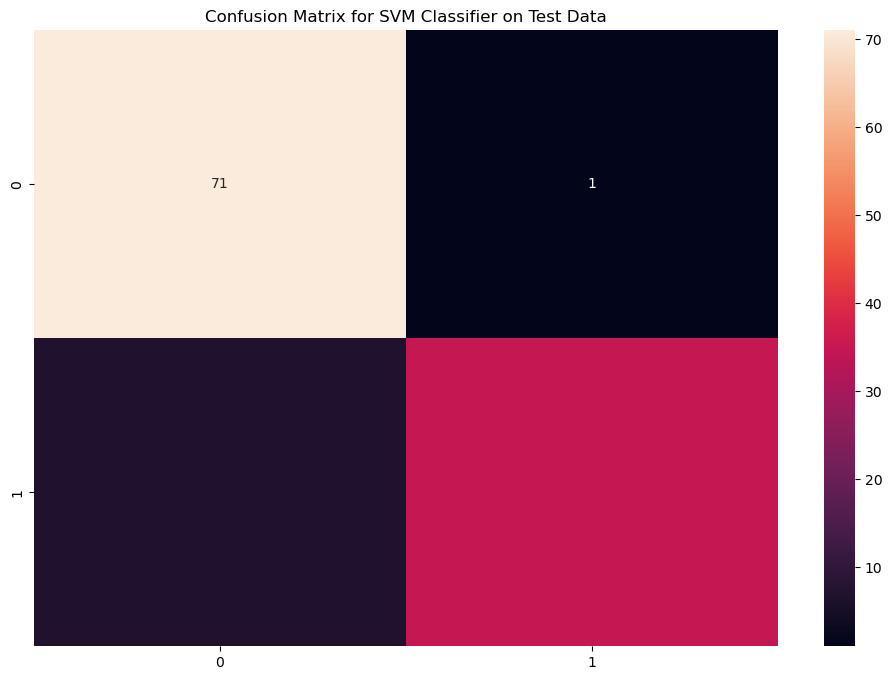

Accuracy on train data by Gaussian NBand 93.62637362637362
Accuracy on test data by Gaussian NB and 95.6140350877193


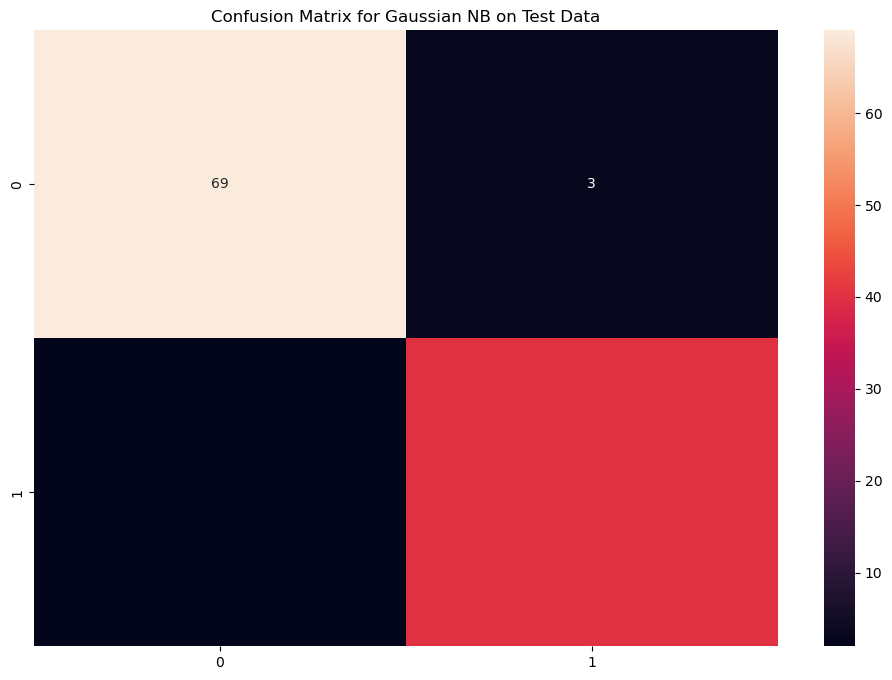

Accuracy on train data by Random Forestand 99.78021978021978
Accuracy on test data by Random Forest and 96.49122807017544


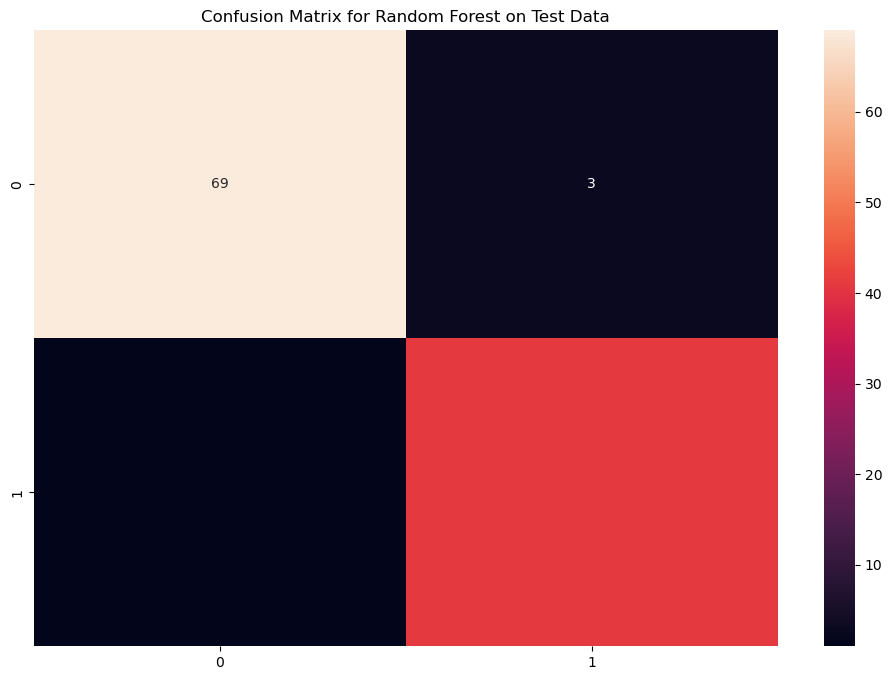

In [150]:
models = {
    "SVM Classifier":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

for model_name in models:
    model = models[model_name]
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"Accuracy on train data by {model_name}and {accuracy_score(y_train, model.predict(X_train))*100}")

    print(f"Accuracy on test data by {model_name} and {accuracy_score(y_test, preds)*100}")
    cf_matrix = confusion_matrix(y_test, preds)
    plt.figure(figsize=(12,8))
    sns.heatmap(cf_matrix, annot=True)
    plt.title(f"Confusion Matrix for {model_name} on Test Data")
    plt.show()

Accuracy on Test dataset by the combined model: 96.49122807017544


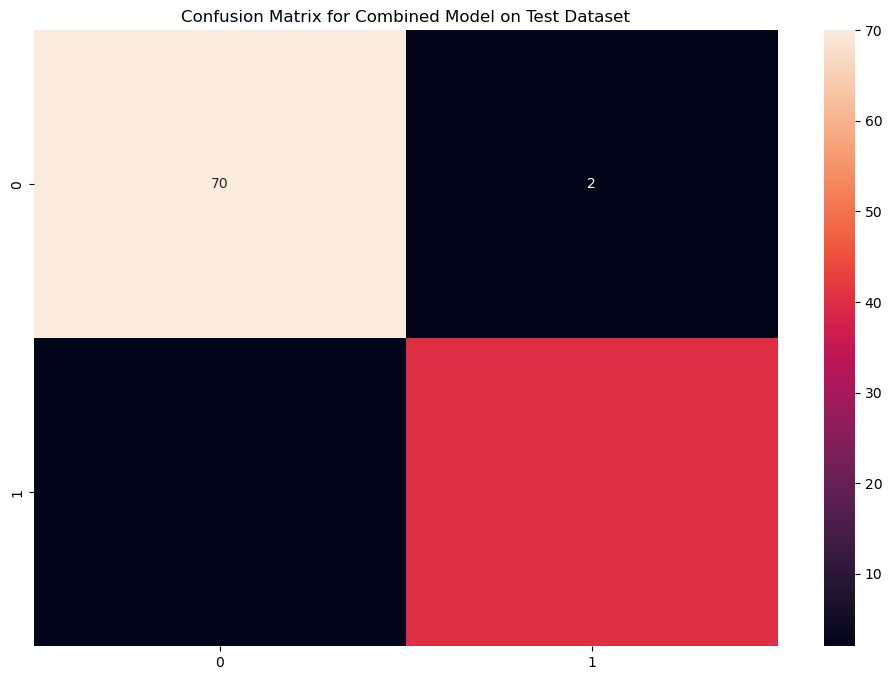

In [164]:
from sklearn.metrics import accuracy_score
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X_train, y_train)
final_nb_model.fit(X_train, y_train)
final_rf_model.fit(X_train, y_train)


# Making prediction by take mode of predictions 
# made by all the classifiers
svm_preds = final_svm_model.predict(X_test)
nb_preds = final_nb_model.predict(X_test)
rf_preds = final_rf_model.predict(X_test)

!pip install scipy
from scipy import stats

final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(y_test, final_preds)*100}")

cf_matrix = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [166]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000) 
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 86.37%
Testing Accuracy: 88.60%


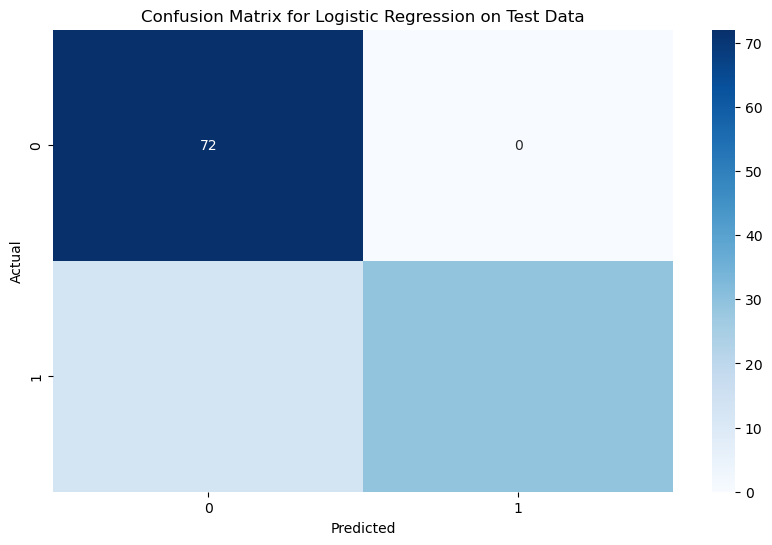

In [168]:
cf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression on Test Data')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [182]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{0: 285, 1: 170}
